In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [18]:
# Read in the image and print some stats
image = mpimg.imread('../resources/test.jpg')

In [19]:
# print the type of the image and image dimention
print('This image is: ', type(image),
         'with dimensions:', image.shape)

This image is:  <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


In [20]:
# Pull out the x and y sizes and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]

In [28]:
# copy the image
region_select = np.copy(image)

In [2]:
# Define a triangle region of interest
# Keep in mind the origin (x=0, y=0) is in the upper left in image processing
left_bottom = [0, 539]
right_bottom = [900, 300]
apex = [400, 0]

In [15]:
## Programming Logic Explanation: 
# Using np.polyfit 
# We create a dataset that we then fit with a straight line $f(x) = m x + c$.
npoints = 20
slope = 2
offset = 3
x = np.arange(npoints)
y = slope * x + offset + np.random.normal(size=npoints) # y = mx + c where c = offset + np.random.normal(size=npoints)
p = np.polyfit(x,y,1)           # Last argument is degree of polynomial

In [4]:
# Fit lines (y=Ax+B) to identify the  3 sided region of interest
# np.polyfit() returns the coefficients [A, B] of the fit
# p = polyfit(x,y,n) returns the coefficients for a polynomial p(x) of degree n that is a best fit (in a least-squares sense) for the data in y.
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

In [12]:
## Programming Logic Explanation: 
# [X,Y] = meshgrid(x,y) returns 2-D grid coordinates based on the coordinates contained in vectors x and y. X is a 
# matrix where each row is a copy of x, and Y is a matrix where each column is a copy of y. The grid represented by the 
# coordinates X and Y has length(y) rows and length(x) columns.
x = np.arange(1, 3)
y = np.arange(1, 5)
[X,Y] = np.meshgrid(x,y)
print(X)
print(Y)

[[1 2]
 [1 2]
 [1 2]
 [1 2]]
[[1 1]
 [2 2]
 [3 3]
 [4 4]]


In [21]:
# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))

In [23]:
## Programming Logic Explanation: 
print(XX)

print(YY)

[[  0   1   2 ... 957 958 959]
 [  0   1   2 ... 957 958 959]
 [  0   1   2 ... 957 958 959]
 ...
 [  0   1   2 ... 957 958 959]
 [  0   1   2 ... 957 958 959]
 [  0   1   2 ... 957 958 959]]
[[  0   0   0 ...   0   0   0]
 [  1   1   1 ...   1   1   1]
 [  2   2   2 ...   2   2   2]
 ...
 [537 537 537 ... 537 537 537]
 [538 538 538 ... 538 538 538]
 [539 539 539 ... 539 539 539]]


In [26]:
## Programming Logic Explanation: 
print(region_thresholds)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False  True ... False False False]
 [False  True  True ... False False False]
 [False False False ... False False False]]


In [27]:
# Color pixels red which are inside the region of interest
region_select[region_thresholds] = [255, 0, 0]

NameError: name 'region_select' is not defined

In [29]:
## Programming Logic Explanation: 
print(region_select)

[[[122 185 229]
  [122 185 229]
  [123 186 230]
  ...
  [123 184 229]
  [123 184 229]
  [123 184 229]]

 [[122 185 229]
  [122 185 229]
  [122 185 229]
  ...
  [123 184 229]
  [123 184 229]
  [123 184 229]]

 [[122 185 229]
  [122 185 229]
  [122 185 229]
  ...
  [123 184 229]
  [123 184 229]
  [123 184 229]]

 ...

 [[154 166 154]
  [156 168 156]
  [153 165 153]
  ...
  [180 197 181]
  [181 198 182]
  [181 198 182]]

 [[162 174 164]
  [160 172 162]
  [152 164 154]
  ...
  [174 192 176]
  [175 193 177]
  [176 194 178]]

 [[156 168 158]
  [148 160 150]
  [137 149 139]
  ...
  [161 179 163]
  [162 180 164]
  [162 180 164]]]


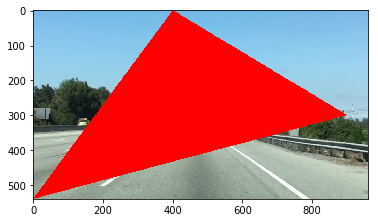

In [10]:
# Display the image
plt.imshow(region_select)

In [11]:
# uncomment if plot does not display
plt.show()